https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('OnlineNewsPopularity.csv', header=0)
names = df.columns
stripped = [s.strip() for s in names]
df.columns=stripped

In [15]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [16]:
df.drop(columns=['url', 'timedelta'],inplace=True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Odrzucanie url i timedelta jako nierelewantne

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

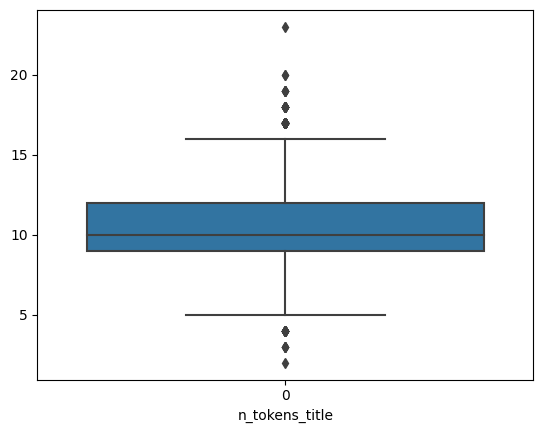

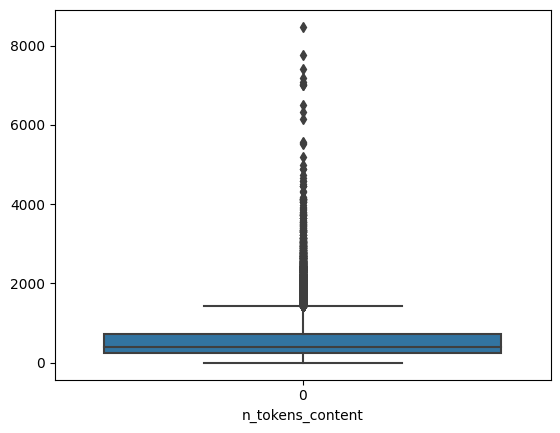

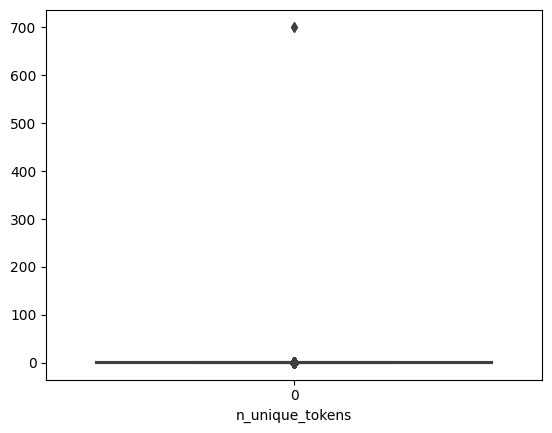

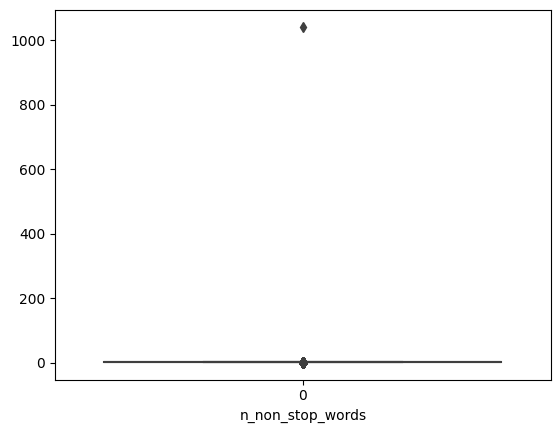

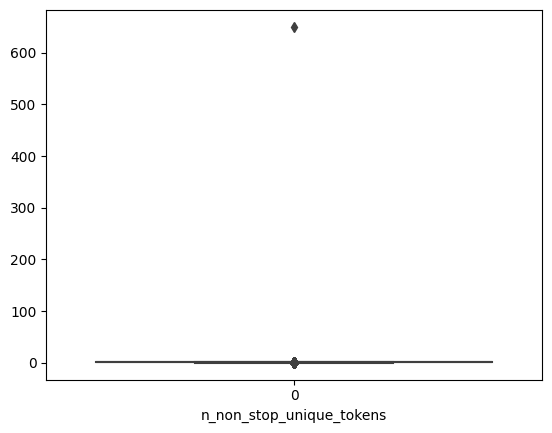

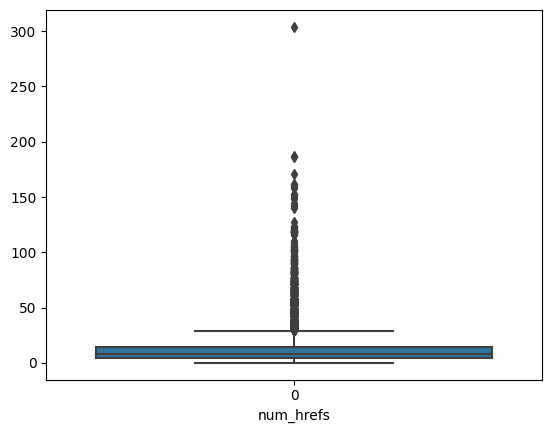

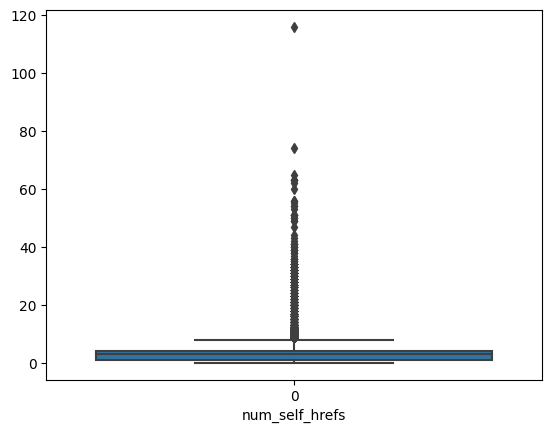

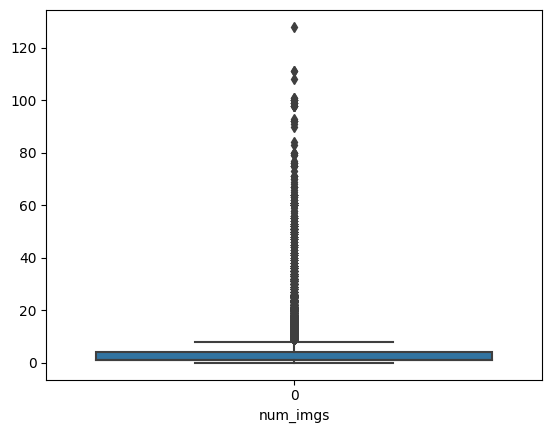

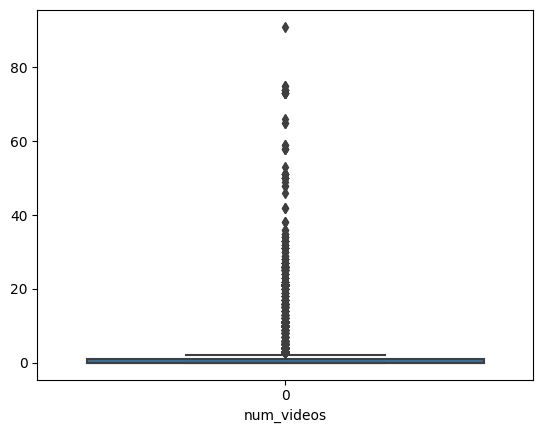

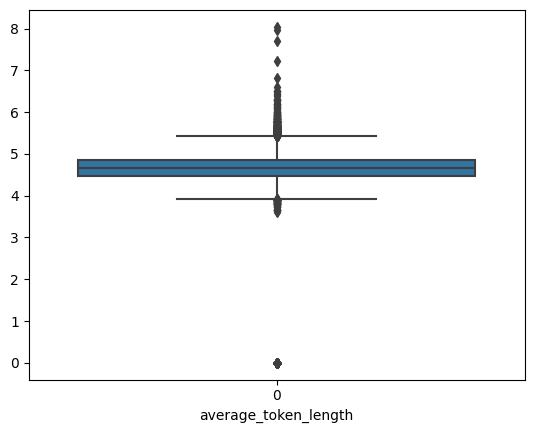

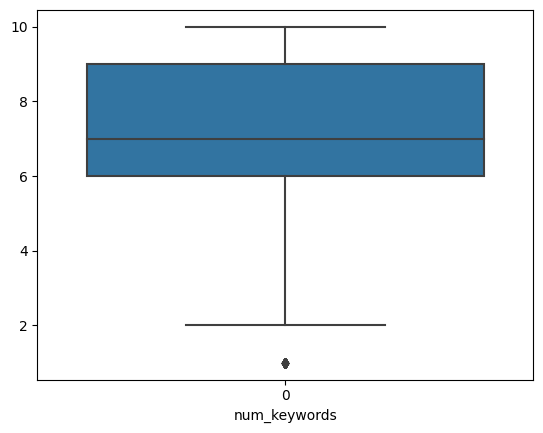

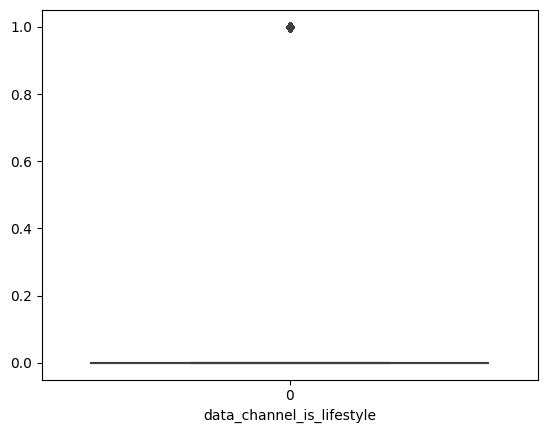

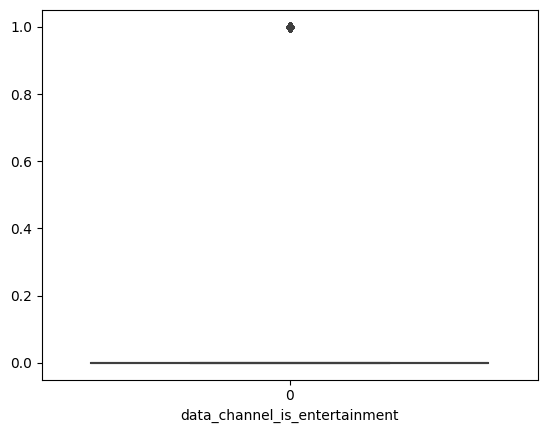

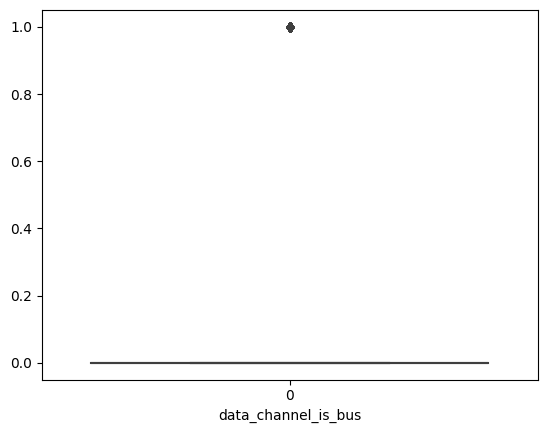

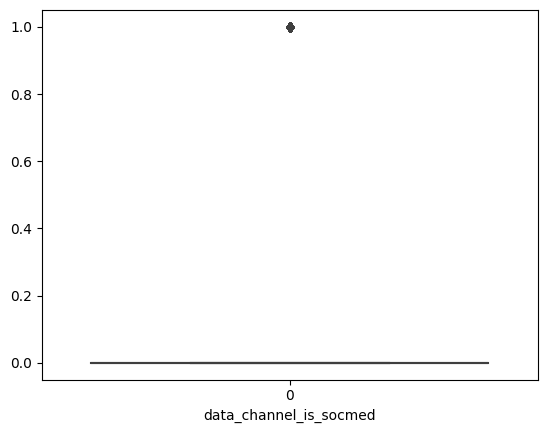

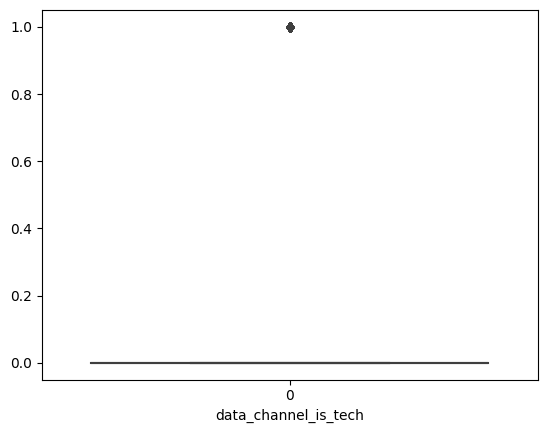

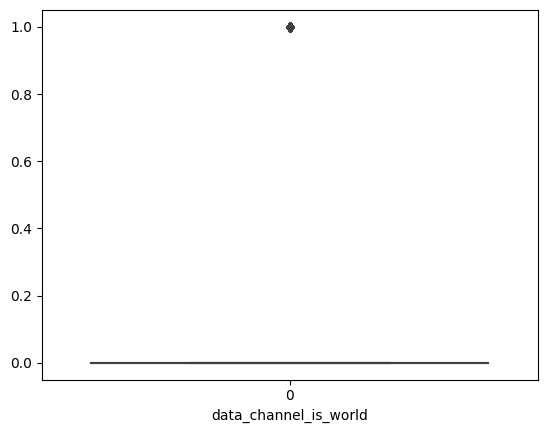

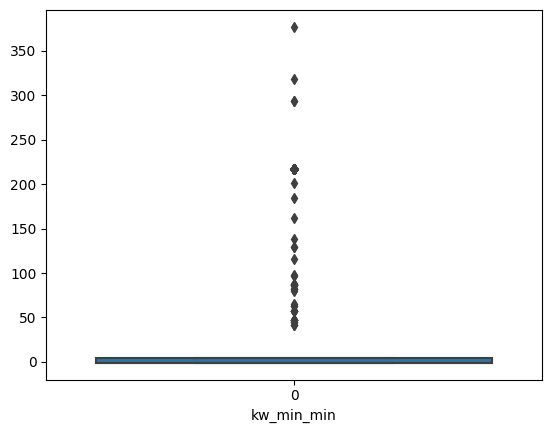

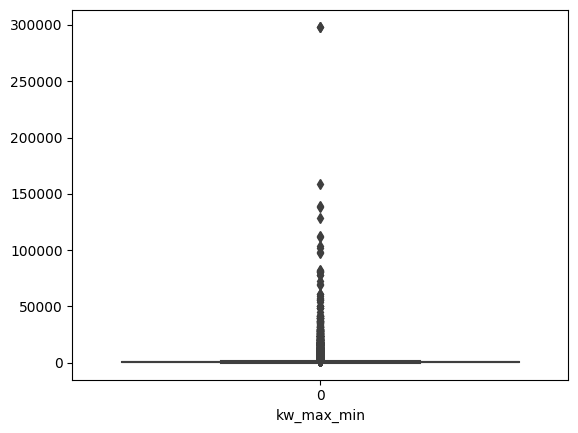

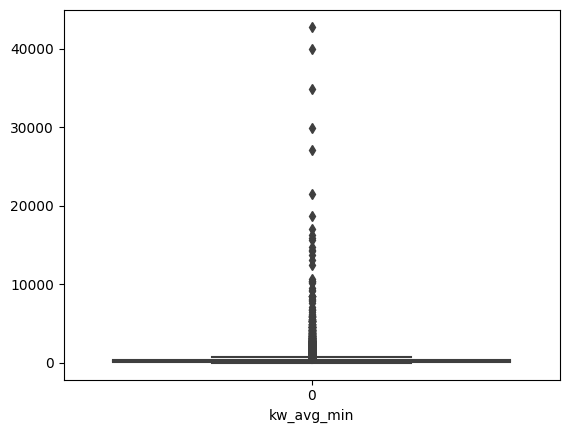

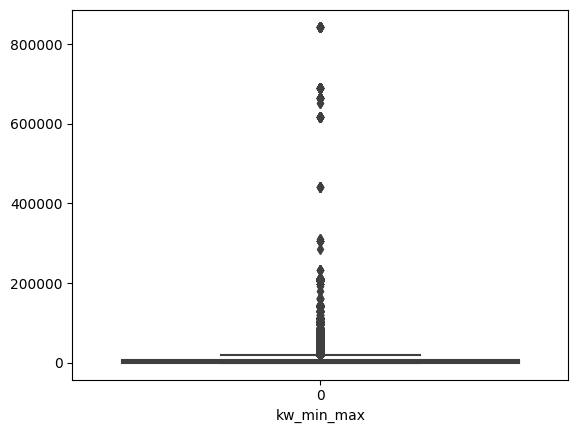

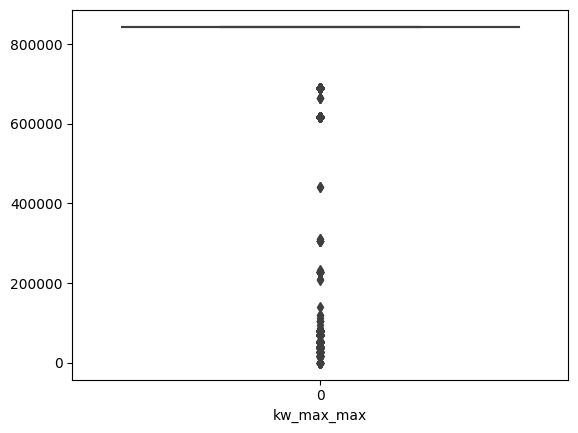

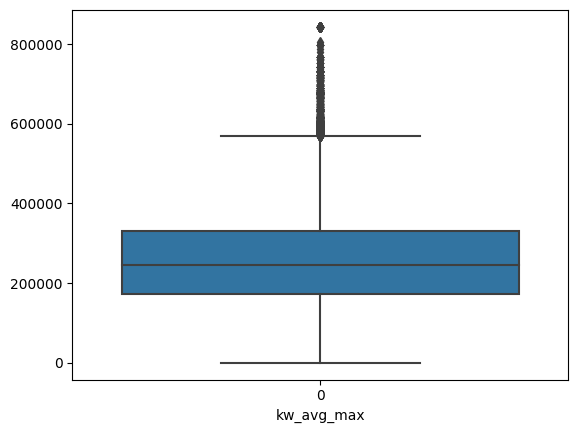

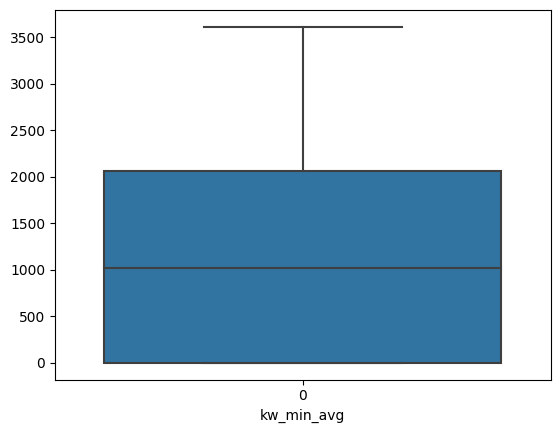

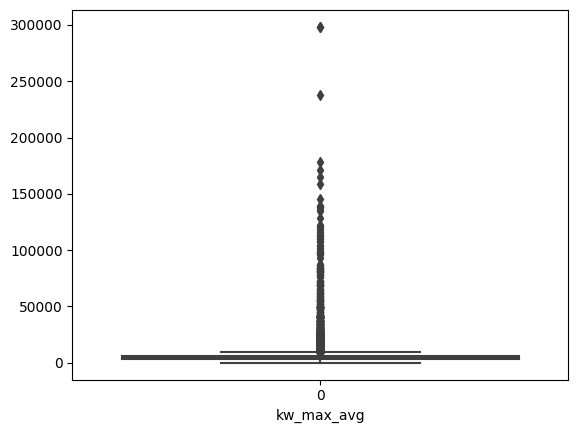

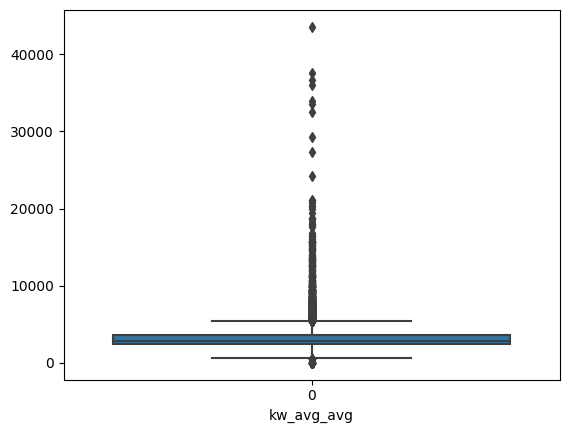

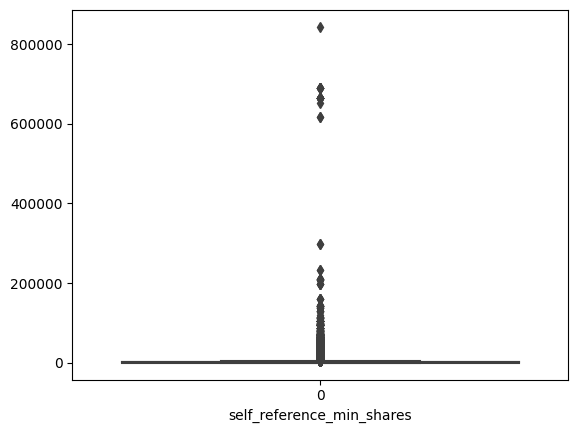

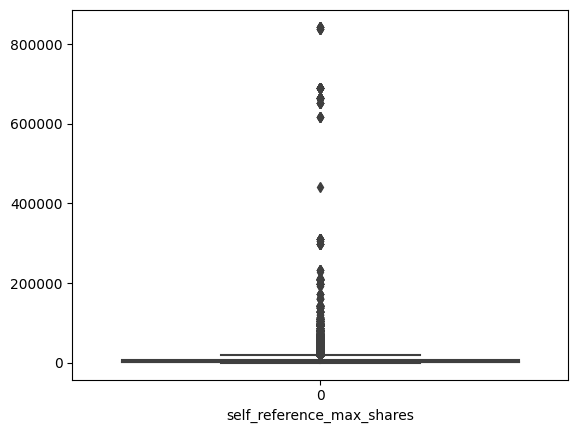

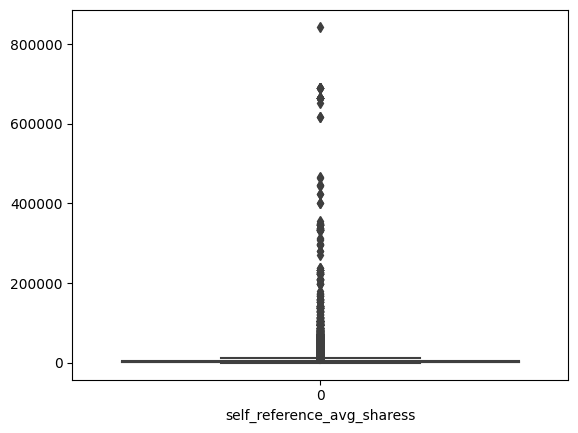

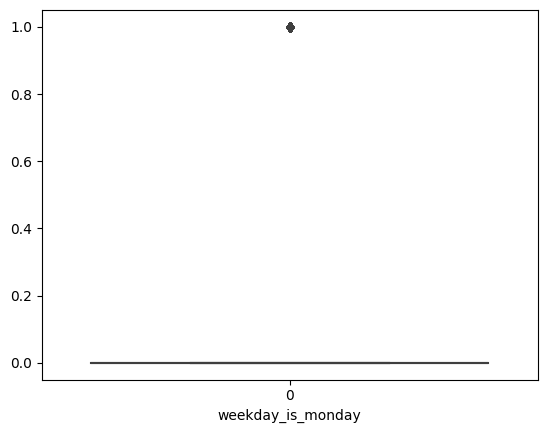

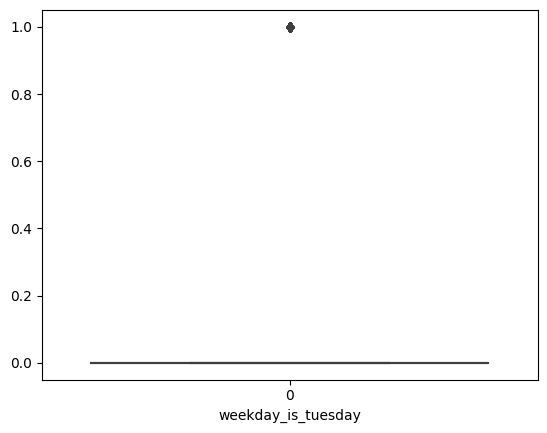

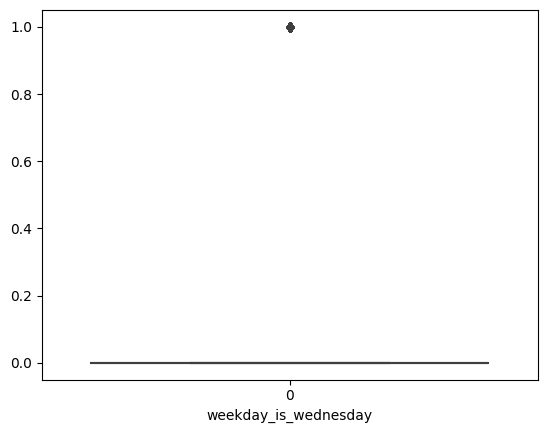

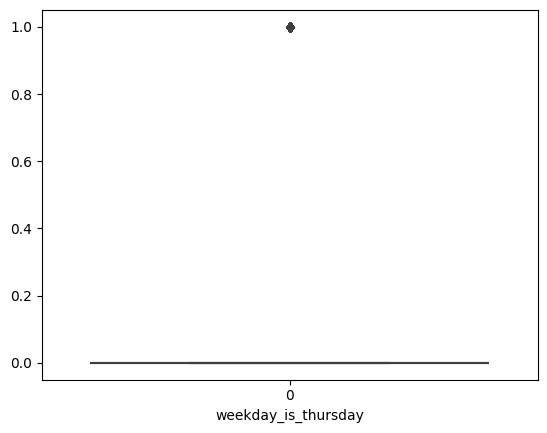

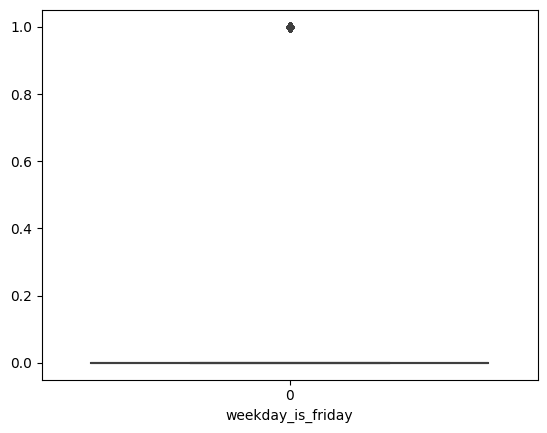

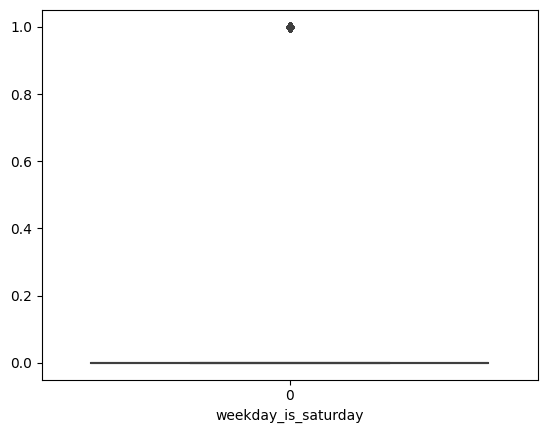

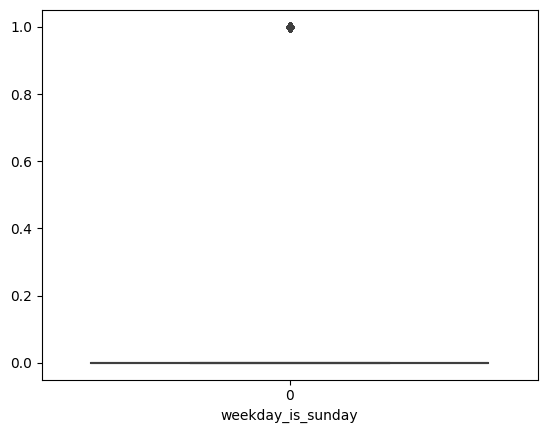

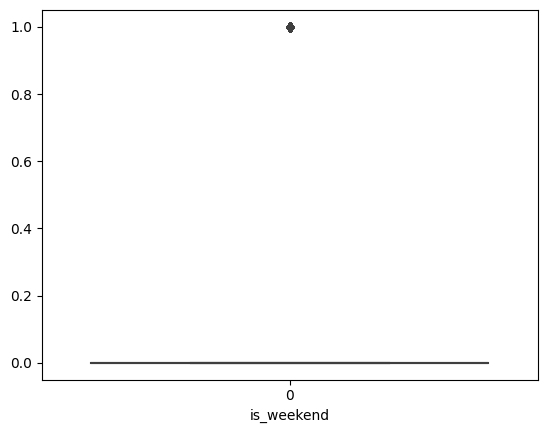

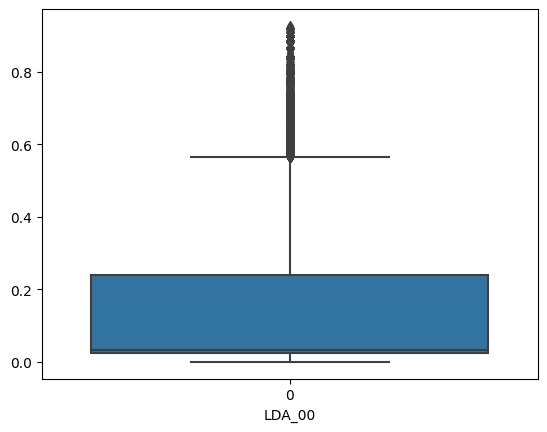

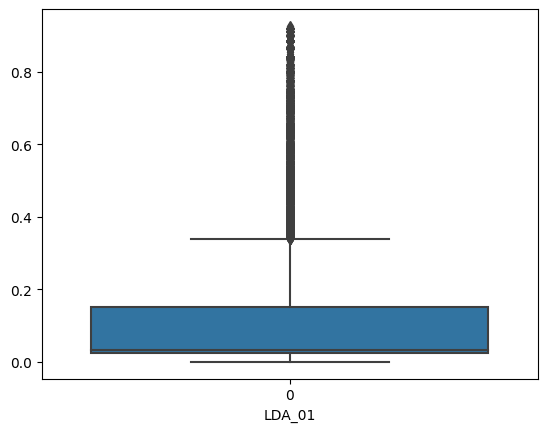

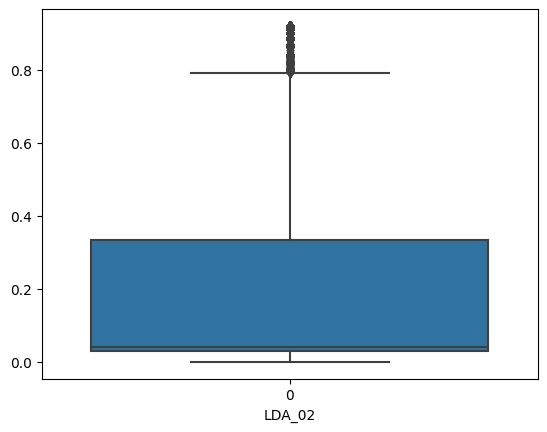

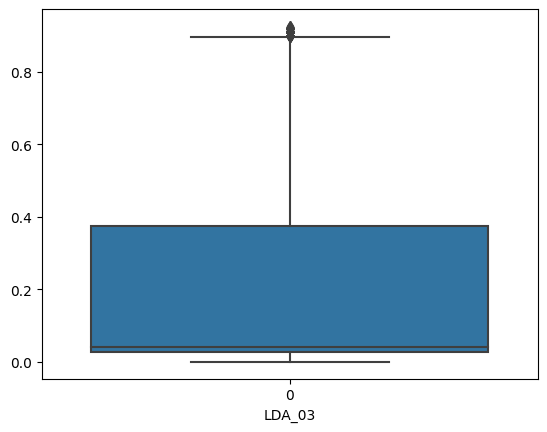

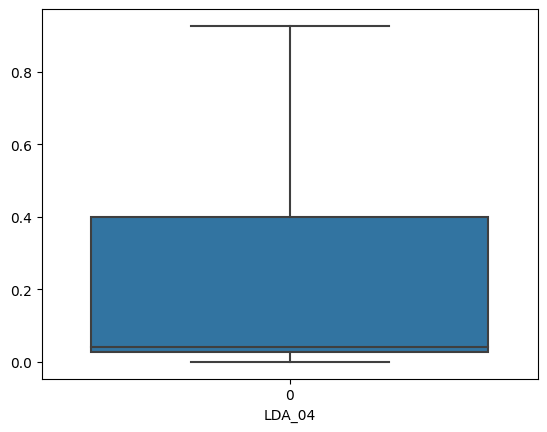

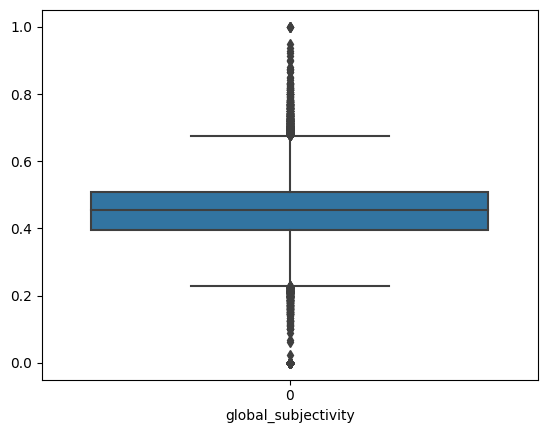

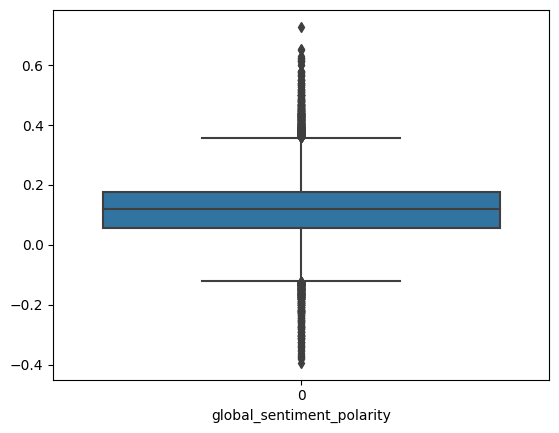

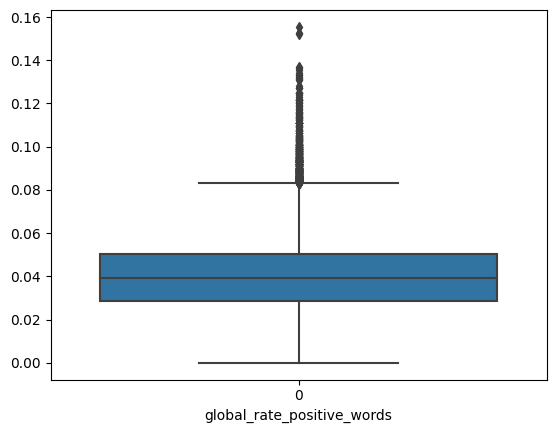

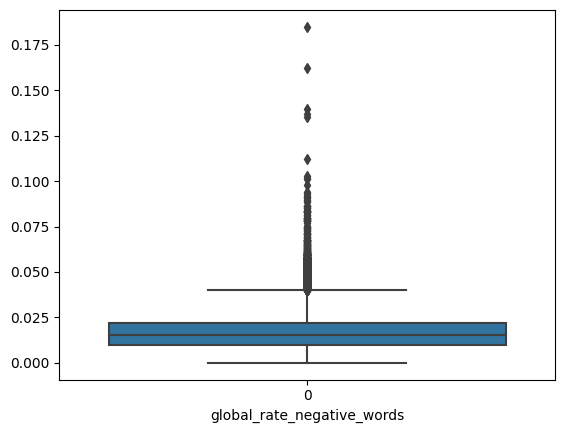

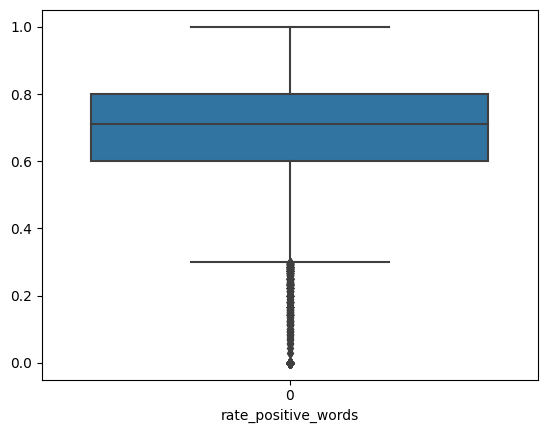

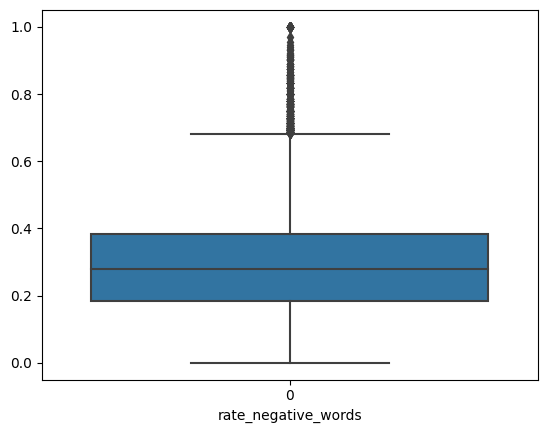

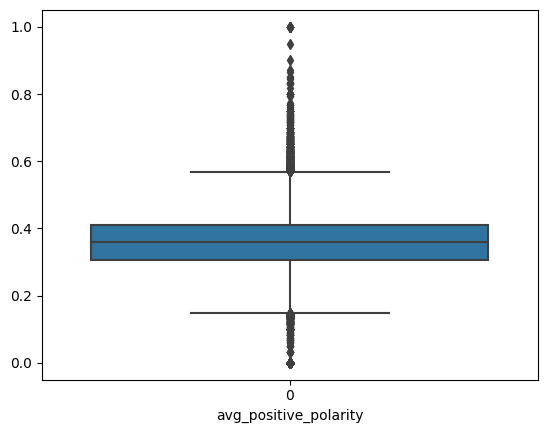

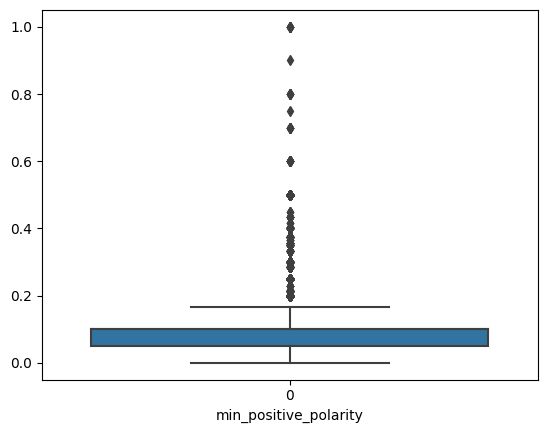

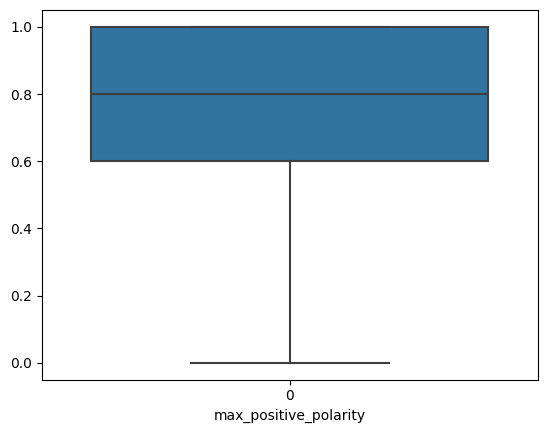

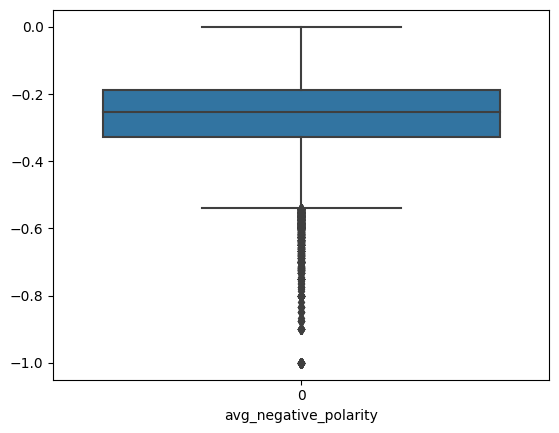

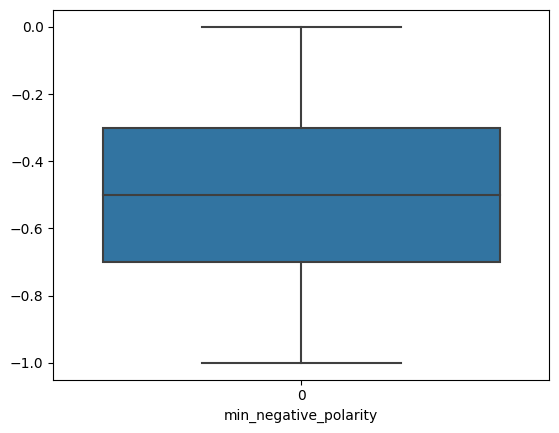

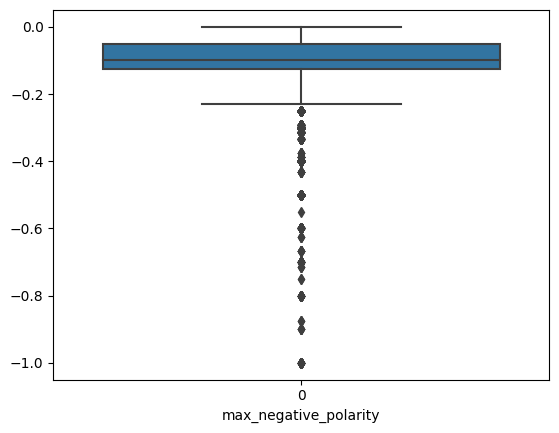

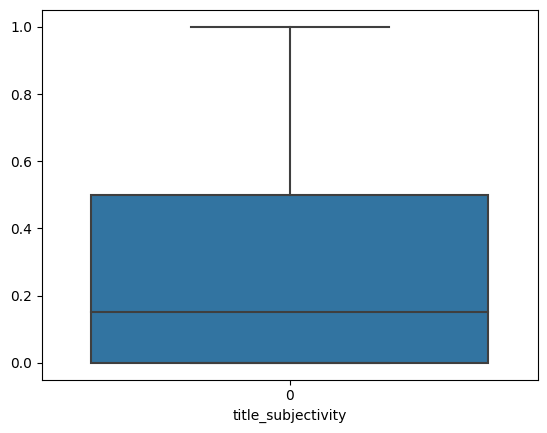

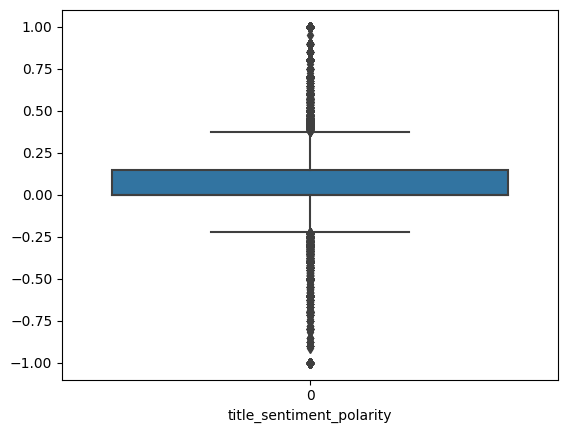

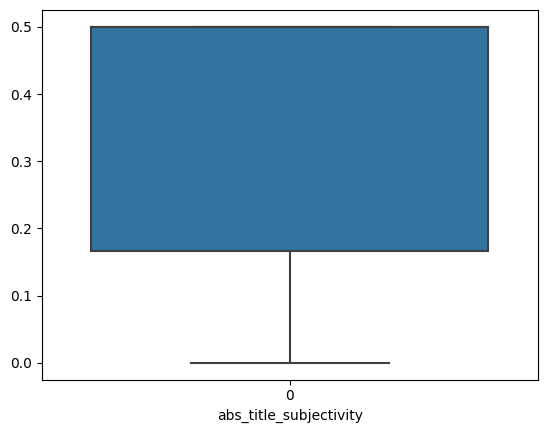

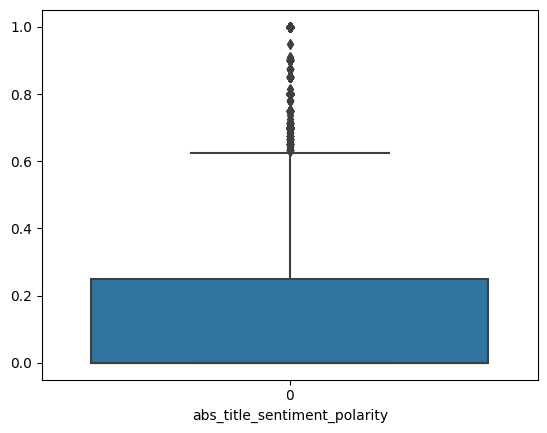

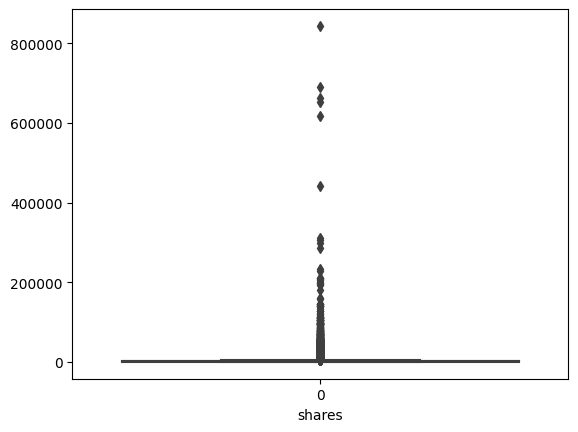

In [18]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
    # print(df[i])

In [19]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]
print(target.shape)
print(target.loc[:10])

(39644,)
0      593
1      711
2     1500
3     1200
4      505
5      855
6      556
7      891
8     3600
9      710
10    2200
Name: shares, dtype: int64


In [20]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


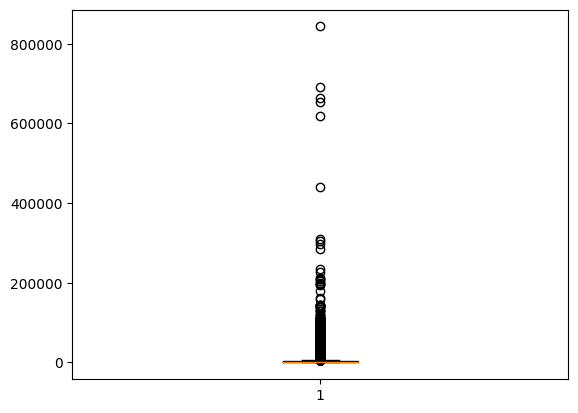

In [21]:


plt.boxplot(target)
plt.show()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [23]:
target.max()

843300

(array([3.7459e+04, 1.3670e+03, 3.8900e+02, 1.4200e+02, 8.4000e+01,
        6.1000e+01, 3.1000e+01, 2.3000e+01, 1.4000e+01, 1.6000e+01,
        1.4000e+01, 8.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

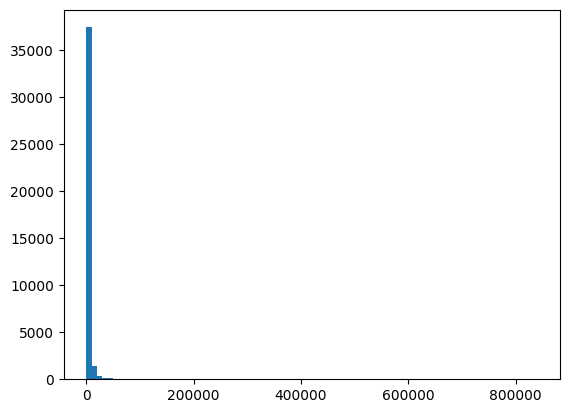

In [24]:

plt.hist(target, bins=np.arange(target.min(), target.max()+1, 10_000))
# plt.hist(data, weights=np.ones(len(data)) / len(data))

In [25]:
df.shape

(39644, 59)

In [26]:
df.drop(df[df.shares > 20_000].index, inplace=True)

In [27]:
df.shape

(38826, 59)

In [28]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,...,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000
mean,10.392314,547.245918,0.548635,0.997682,0.689942,10.818472,3.302375,4.492273,1.234946,4.551763,...,0.095346,0.756769,-0.258931,-0.521048,-0.107369,0.281166,0.071036,0.341915,0.155153,2444.417555
std,2.112303,468.791460,3.557514,5.285931,3.298897,11.202371,3.868649,8.237133,4.092526,0.836352,...,0.071144,0.247117,0.127222,0.289719,0.095090,0.323584,0.264247,0.188894,0.225388,2834.326063
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,248.000000,0.470852,1.000000,0.626042,4.000000,1.000000,1.000000,0.000000,4.479167,...,0.050000,0.600000,-0.327477,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,939.000000
50%,10.000000,411.000000,0.538922,1.000000,0.690476,7.000000,3.000000,1.000000,0.000000,4.665267,...,0.100000,0.800000,-0.252703,-0.500000,-0.100000,0.133333,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608160,1.000000,0.754537,13.000000,4.000000,4.000000,1.000000,4.855548,...,0.100000,1.000000,-0.186345,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2600.000000
max,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,20000.000000


In [29]:
data = df.iloc[:,2:-1]
target = df.iloc[:,-1]
print(target.shape)
print(target.loc[:10])

(38826,)
0      593
1      711
2     1500
3     1200
4      505
5      855
6      556
7      891
8     3600
9      710
10    2200
Name: shares, dtype: int64


<AxesSubplot: >

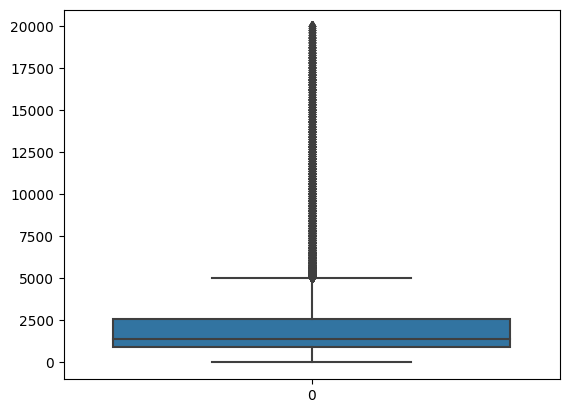

In [30]:
# from matplotlib.ticker import PercentFormatter

# plt.hist(target, bins=np.arange(target.min(), target.max()+1, 1_000))
sns.boxplot(target)
# plt.hist(data, weights=np.ones(len(data)) / len(data))

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

data.hist(bins=100, figsize=(100,100))
plt.show()

import seaborn as sb

sb.pairplot(data, diag_kind="kde")

from pandas.plotting import scatter_matrix

scatter_m = scatter_matrix(data, figsize=(100,100), diagonal="kde")

In [32]:
data_np = np.array(data, dtype=np.int16)
target_np = np.array(target, dtype=np.int16)

In [33]:
print("First client in database")
print(data_np[1,:])
print('---Mean---')
print(data_np.mean(axis=0))
print('--std---')
print(data_np.std(axis=0))

First client in database
[0 0 0 3 1 1 0 4 4 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
---Mean---
[ 1.80549117e-02  2.68376861e-02  1.67413589e-02  1.08184722e+01
  3.30237470e+00  4.49227322e+00  1.23494565e+00  4.00414671e+00
  7.22096018e+00  5.27224025e-02  1.78050791e-01  1.59145933e-01
  5.88780714e-02  1.87065369e-01  2.14830268e-01  2.61763767e+01
  1.01599253e+03  3.05550430e+02  2.91969809e+03 -8.10525122e+03
  5.77423994e+02  1.11101409e+03  5.16608966e+03  3.10377585e+03
  2.24011773e+03  4.11818145e+03  3.42771133e+03  1.67439345e-01
  1.86704785e-01  1.87786535e-01  1.83588317e-01  1.43949930e-01
  6.16854685e-02  6.88456189e-02  1.30531087e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.03023747e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.45129552e-02  7.72678102e-04  2.06047494e-04  2.06047494e-04
  3.73229279e-01 -1.31355277e-03 -1.38747231e-01 -1.31355277e-03
  6.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_np)

In [35]:
print("First client in database")
print(scaled_data[1,:])
print('---Mean---')
print(scaled_data.mean(axis=0))
print('--std---')
print(scaled_data.std(axis=0))

First client in database
[-0.0050751  -0.0050751  -0.0050751  -0.69793908 -0.59514434 -0.42397254
 -0.30176025 -0.00537177 -1.68443964 -0.23591685 -0.46542474  2.29859545
 -0.25012312 -0.47969908 -0.52307741 -0.37550128 -0.50242159 -0.5469649
 -0.32610362  0.66754261 -0.03033653 -0.98191121 -1.47481833 -2.41457246
 -0.45764825 -0.51283803 -0.54090475  2.22986815 -0.47913028 -0.48083617
 -0.47420695 -0.41006825 -0.25639952 -0.27191133 -0.38746274  0.
  0.          0.          0.          0.         -0.01015058  0.
  0.          0.         -0.18906792 -0.02780783 -0.01435583 -0.01435583
 -0.77167335  0.0362668   0.40137179  0.0362668  -0.2594663  -0.06874367
  0.         -0.13490714]
---Mean---
[-9.15034688e-19 -1.83006938e-19 -1.09804163e-18  6.73465530e-17
 -4.97778870e-17 -2.63529990e-17 -2.70850268e-17 -2.81098656e-16
 -2.63529990e-17  2.92811100e-18  4.83138315e-17  3.80654430e-17
  6.44184420e-17  6.44184420e-17  8.19871080e-17  1.63974216e-16
 -2.92811100e-18  5.27059980e-17  3.51

In [36]:
from sklearn.model_selection import train_test_split

news_train_data, news_test_data, \
news_train_target, news_test_target = \
train_test_split(scaled_data,target, test_size=0.2, random_state=10)

In [37]:
print("Training dataset:")
print("patients_train_data:", news_train_data.shape)
print("patients_train_target:", news_train_target.shape)

Training dataset:
patients_train_data: (31060, 56)
patients_train_target: (31060,)


In [38]:
print("Training dataset:")
print("patients_train_data:", news_test_data.shape)
print("patients_train_target:", news_test_target.shape)
print(news_test_data[:])
print(news_test_target.iloc[:1])

Training dataset:
patients_train_data: (7766, 56)
patients_train_target: (7766,)
[[-0.0050751  -0.0050751  -0.0050751  ... -0.06874367  0.
  -0.13490714]
 [-0.0050751  -0.0050751  -0.0050751  ... -0.06874367  0.
  -0.13490714]
 [-0.0050751  -0.0050751  -0.0050751  ... -0.06874367  0.
  -0.13490714]
 ...
 [-0.0050751  -0.0050751  -0.0050751  ... -0.06874367  0.
  -0.13490714]
 [-0.0050751  -0.0050751  -0.0050751  ... -0.06874367  0.
  -0.13490714]
 [-0.0050751  -0.0050751  -0.0050751  ... -0.06874367  0.
  -0.13490714]]
14648    563
Name: shares, dtype: int64


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[ 5.74570458e-02 -4.69897434e+23  6.36375674e-02  5.42563979e-02
  5.88665988e-02]


In [40]:
print("Wyniki: ", scores)
print("Średnia: ", scores.mean())    
print("Odchylenie standardowe: ", scores.std())    

Wyniki:  [ 5.74570458e-02 -4.69897434e+23  6.36375674e-02  5.42563979e-02
  5.88665988e-02]
Średnia:  -9.397948673147995e+22
Odchylenie standardowe:  1.879589734629599e+23


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
scores = cross_val_score(sgd_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[-1.15897207e+15 -1.64108376e+11 -1.18601143e+14 -3.84905342e+14
 -4.04809312e+13]


In [42]:
print("Wyniki: ", scores)
print("Średnia: ", scores.mean())    
print("Odchylenie standardowe: ", scores.std())    

Wyniki:  [-1.15897207e+15 -1.64108376e+11 -1.18601143e+14 -3.84905342e+14
 -4.04809312e+13]
Średnia:  -340624718368232.94
Odchylenie standardowe:  430568774100948.75


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[-0.89777304 -0.93942302 -1.07568825 -0.90278223 -1.14699674]


In [44]:
print("Wyniki: ", scores)
print("Średnia: ", scores.mean())    
print("Odchylenie standardowe: ", scores.std())    

Wyniki:  [-0.89777304 -0.93942302 -1.07568825 -0.90278223 -1.14699674]
Średnia:  -0.9925326552222813
Odchylenie standardowe:  0.10062719694094423


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
scores = cross_val_score(knn_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[-0.08108721 -0.07287363 -0.08671003 -0.07866807 -0.13259928]


In [46]:
print("Wyniki: ", scores)
print("Średnia: ", scores.mean())    
print("Odchylenie standardowe: ", scores.std())    

Wyniki:  [-0.08108721 -0.07287363 -0.08671003 -0.07866807 -0.13259928]
Średnia:  -0.09038764508930627
Odchylenie standardowe:  0.02156819217915147


from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor

gauss_reg = GaussianProcessRegressor()
scores = cross_val_score(gauss_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

print("Wyniki: ", scores)
print("Średnia: ", scores.mean())    
print("Odchylenie standardowe: ", scores.std())    

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    # 'n_neighbors': [3,5,7,10,15], 'weights':['uniform','distance'], 'leaf_size':[15,30,60,90]
    'n_neighbors': [10,15], 'weights':['uniform','distance'], 'leaf_size':[5,15,30]
}


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring="r2", cv=5, return_train_score=True, verbose=3)
grid_search.fit(news_train_data, news_train_target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.176, test=-0.008) total time=   0.4s
[CV 2/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.175, test=-0.000) total time=   0.4s
[CV 3/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.173, test=-0.002) total time=   0.4s
[CV 4/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.181, test=-0.013) total time=   0.4s
[CV 5/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.182, test=-0.032) total time=   0.4s
[CV 1/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=-0.010) total time=   0.4s
[CV 2/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=-0.001) total time=   0.4s
[CV 3/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=-0.004) total time=   0.5s
[CV 4/5] END leaf_size=5, n_neighbors=10

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [5, 15, 30], 'n_neighbors': [10, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2', verbose=3)

In [48]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.014274162227229815
{'leaf_size': 5, 'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsRegressor(leaf_size=5, n_neighbors=15)


In [49]:
lin_reg.fit(news_train_data, news_train_target)
sgd_reg.fit(news_train_data, news_train_target)
tree_reg.fit(news_train_data, news_train_target)
knn_reg = grid_search.best_estimator_
knn_reg.fit(news_train_data, news_train_target)

KNeighborsRegressor(leaf_size=5, n_neighbors=15)

In [50]:
lin_pred = lin_reg.predict(news_test_data)
sgd_pred = sgd_reg.predict(news_test_data)
knn_pred = knn_reg.predict(news_test_data)
tree_pred = tree_reg.predict(news_test_data)

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def printScores():
      print(" linear reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, lin_pred))
      print(" sgd reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, sgd_pred))
      print(" knn reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, knn_pred))
      print(" tree reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, tree_pred))

      print('linear reg r2 score: %.2f' % r2_score(news_test_target, lin_pred))
      print('sgd reg r2 score: %.2f' % r2_score(news_test_target, sgd_pred))
      print('knn reg r2 score: %.2f' % r2_score(news_test_target, knn_pred))
      print('tree reg r2 score: %.2f' % r2_score(news_test_target, tree_pred))

In [52]:
def plotPredictions():
    fig, ax = plt.subplots(figsize=(30,20))
    size=40
    x = range(size)
    offset=1500
    ax.plot(x, lin_pred[offset:offset+size], label='linear', linestyle=(5, (10, 3)), linewidth='2')  # Plot some data on the (implicit) axes.
    # ax.plot(x, sgd_pred[offset:offset+size], label='sgd')  # etc.
    ax.plot(x, knn_pred[offset:offset+size], label='knn', linestyle=(0, (5, 1)), linewidth='2')
    ax.plot(x, tree_pred[offset:offset+size], label='tree', linestyle=(0, (3, 1, 1, 1)), linewidth='2')
    ax.plot(x, news_test_target.iloc[offset:offset+size], label='real', linewidth='3')
    ax.set_xlabel('sample id')
    ax.set_ylabel('sample value')
    ax.set_title("regressors comparision")
    ax.legend(prop={'size': 40})


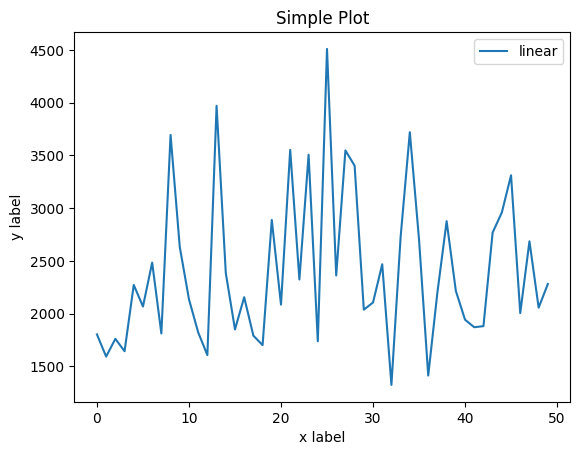

In [53]:
fig, ax = plt.subplots()
ax.plot(lin_pred[:50], label='linear')  # Plot some data on the axes.
# ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
# ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [54]:
# def fitAndEvaluate(regressor, )

In [55]:


# normalizer = Normalizer()
# # lr_poly = LinearRegression()
# pf_r2_score = []
# news_train_poly_arr = []
# news_test_poly_arr = []
# normalized_news_train_poly_arr = []
# normalized_news_test_poly_arr = []
# degrees = 5

# for i in range(1, degrees):
#     pt = PolynomialFeatures(i, )
#     news_train_poly = pt.fit_transform(news_train_data)
#     news_test_poly = pt.fit_transform(news_test_data)
#     news_train_poly_arr.append(news_train_poly)
#     news_test_poly_arr.append(news_test_poly)
    
#     news_test_poly = normalizer.fit_transform(news_test_poly)
#     news_train_poly = normalizer.fit_transform(news_train_poly)
#     # lr_poly.fit(news_train_poly, news_train_t)

#     # pf_mse.append(mean_squared_error(news_test_t, lr_poly.predict(news_test_poly)))
#     # pf_r2_score.append(lr_poly.score(news_test_poly, news_test_t))
#     normalized_news_train_poly_arr.append(news_train_poly)
#     normalized_news_test_poly_arr.append(news_test_poly)
#     # print(i,"Mean squared error of a linear moderl using polynomial features: %.2f" % pf_mse[i])

#     # print(i,"Linear Regression variance score using polynomial features: %.2f" % pf_r2_score[i])
#     print(i," polynomial generated")

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE

pt = PolynomialFeatures(2, )
normalizer = Normalizer()
scaler = StandardScaler()

news_train_poly = pt.fit_transform(news_train_data)
news_test_poly = pt.fit_transform(news_test_data)

normalized_news_train_poly = normalizer.fit_transform(news_train_data)
normalized_news_test_poly = normalizer.fit_transform(news_test_data)

scaled_news_train_poly = scaler.fit_transform(news_train_data)
scaled_news_test_poly = scaler.fit_transform(news_test_data)


In [77]:
def fitAndScore(regressor,train, test, name):
    regressor.fit(train, news_train_target)
    prediction = regressor.predict(test)
    print("Mean squared error of a "+name+": %.2f" % 
        mean_squared_error(news_test_target, prediction))
    score = regressor.score(test, news_test_target) #r2_score
    print("Variance score "+name+": %.2f" % score)
    # print("First 5 predictions for ", name)
    # for i in range(5):
    #     print("predicted: "+str(prediction[i])+", real: "+str(target[i]))



In [78]:
regressors = (lin_reg, knn_reg, tree_reg, sgd_reg)
names = ("lin_reg", "knn_reg", "tree_reg", "sgd_reg")

for reg, name in zip(regressors, names):
    fitAndScore(reg, news_train_poly, news_test_poly, name+" using polynomial features")
    fitAndScore(reg, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
    fitAndScore(reg, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features")

Mean squared error of a lin_reg using polynomial features: 6508741031900082077696.00
Variance score lin_reg using polynomial features: -814263168435658.50
First 5 predictions for  lin_reg using polynomial features
Mean squared error of a lin_reg using normalized polynomial features: 7408097.67
Variance score lin_reg using normalized polynomial features: 0.07
First 5 predictions for  lin_reg using normalized polynomial features
Mean squared error of a lin_reg using scaled polynomial features: 1797627140016683255242686464.00
Variance score lin_reg using scaled polynomial features: -224888586521103400960.00
First 5 predictions for  lin_reg using scaled polynomial features
Mean squared error of a knn_reg using polynomial features: 7825989.93
Variance score knn_reg using polynomial features: 0.02
First 5 predictions for  knn_reg using polynomial features
Mean squared error of a knn_reg using normalized polynomial features: 7776182.69
Variance score knn_reg using normalized polynomial featur

In [ ]:

# for reg, name in zip(regressors, names):
#     rfe = RFE(estimator=reg, n_features_to_select=45)
#     fitAndScore(reg, news_train_poly, news_test_poly, name+" using polynomial features")
#     fitAndScore(reg, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
#     fitAndScore(reg, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features")

In [80]:
news_train_poly.shape

(31060, 1653)

In [84]:
from sklearn.feature_selection import RFE
features = [1000,250,150,100,50]
mse = []
r2_score = []

for reg, name in zip(regressors, names):
    f_mse = []
    f_r2 = []
    for f in features:
        print("name: ", name,", Features:",f)
        sel_ = RFE(estimator=LinearRegression(), n_features_to_select=f)
        sel_.fit(news_train_poly, news_train_target)
        # fitAndScore(sel_, news_train_poly, news_test_poly, name+" using polynomial features")
        # fitAndScore(sel_, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
        # fitAndScore(sel_, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features") 
        print(sel_.score(news_test_poly, news_test_target))
        # ms_err = mean_squared_error(housig_test_t, sel_.predict(housig_test_poly_arr[i]))
        # f_r2.append(r_err)
        # f_mse.append(ms_err)
        
        # print("degree: ", i,", Features:",f," - Linear Regression variance score using _selected_ polynomial features: %.2f" % r_err)
        
    # mse.append(f_mse)
    # r2_score.append(f_r2)

name:  lin_reg , Features: 1000
